In [4]:
import numpy as np
import pandas as pd
import sqlite3



In [5]:
connection = sqlite3.connect('lotto_numbers')


In [8]:
connection.close()



In [6]:
df = pd.read_sql_query("SELECT * FROM lotto_numbers", connection)

In [7]:
df.head()

,page,date,day_of_week,time_of_day,first,second,third,fourth,fifth
0,7701,"Nov 9, 2014",Sunday,evening,8,15,29,38,40
1,7702,"Nov 10, 2014",Monday,midday,14,29,34,37,43
2,7703,"Nov 10, 2014",Monday,evening,2,3,11,36,38
3,7704,"Nov 11, 2014",Tuesday,midday,1,11,27,39,43
4,7705,"Nov 11, 2014",Tuesday,evening,10,16,37,42,43


In [ ]:
df.describe

In [9]:
import seaborn as sns
%matplotlib inline

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<Axes: xlabel='first', ylabel='count'>

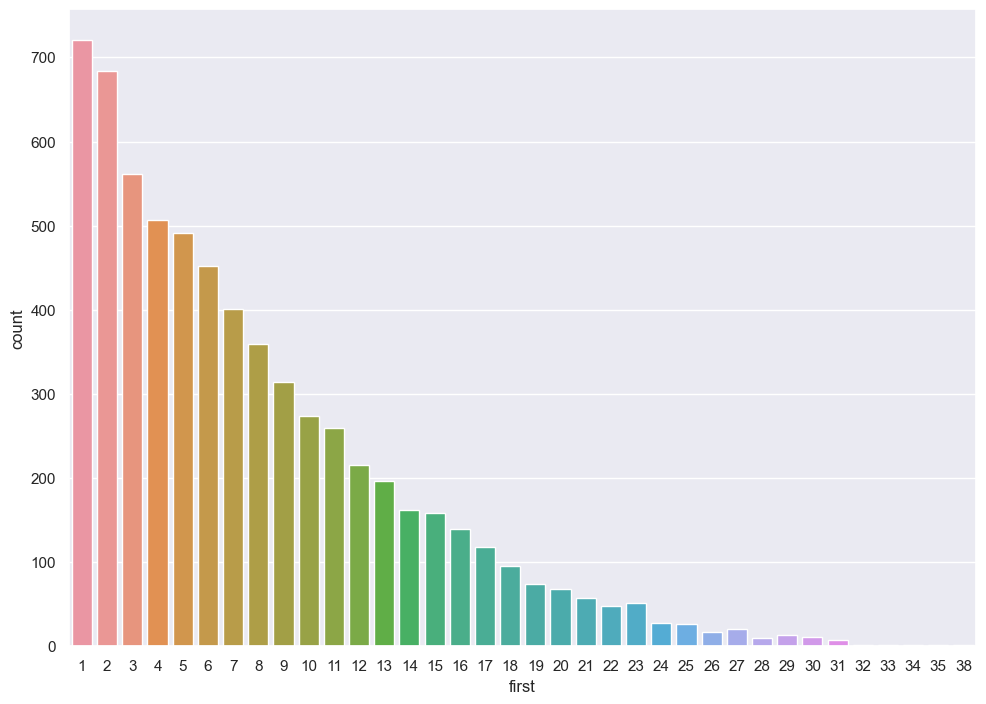

In [11]:
sns.countplot(x='first', data=df)

<Axes: xlabel='second', ylabel='count'>

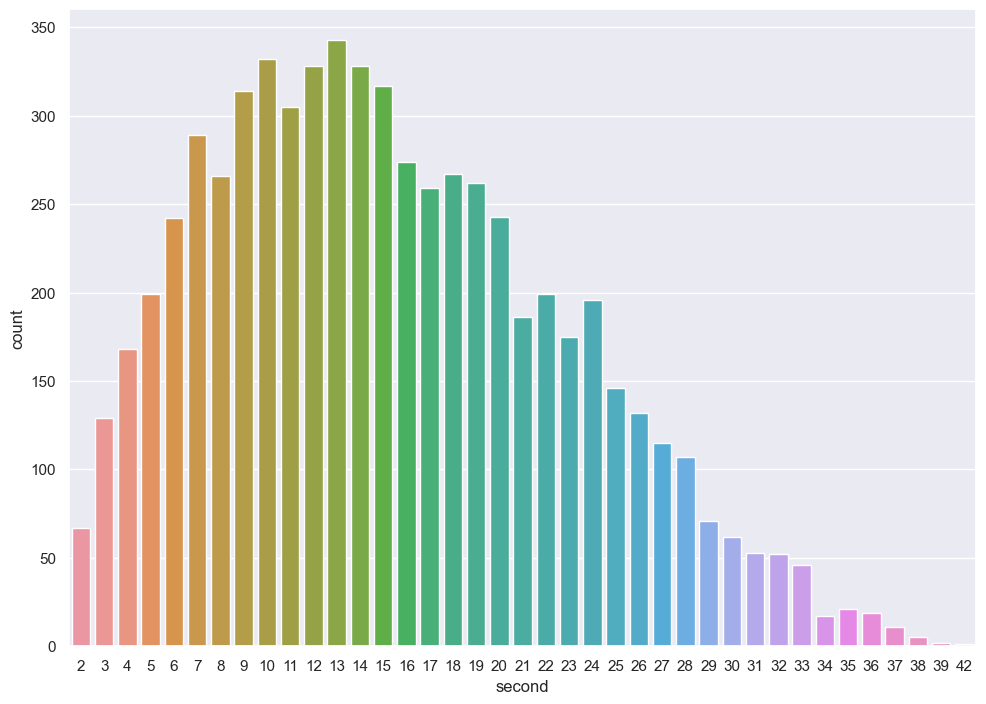

In [12]:
sns.countplot(x='second', data=df)

<Axes: xlabel='third', ylabel='count'>

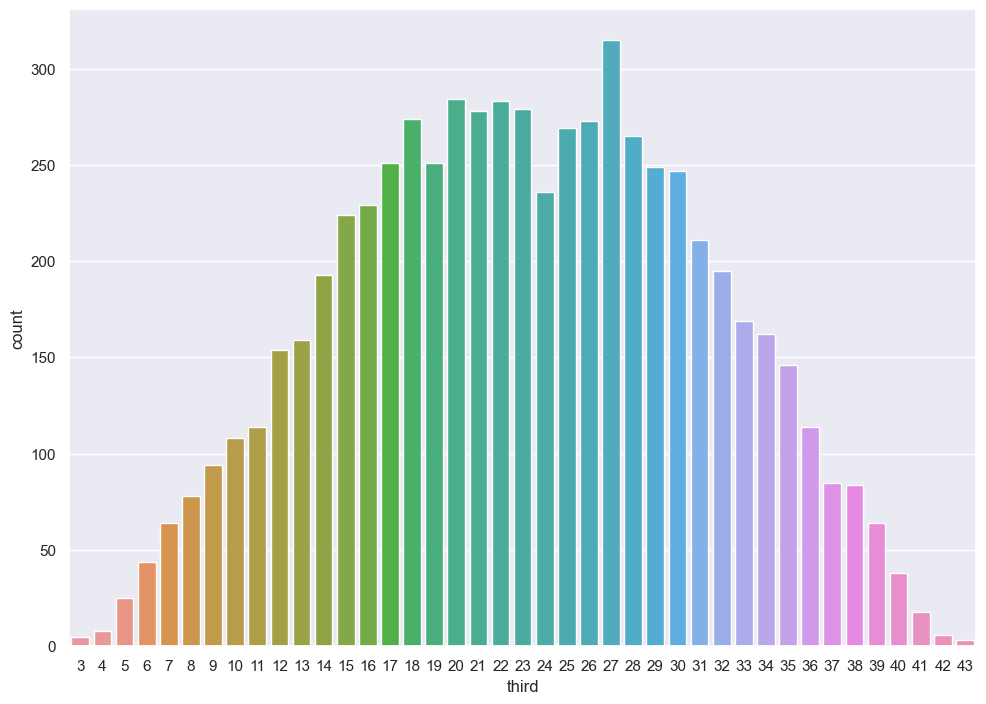

In [13]:
sns.countplot(x='third', data=df)

In [15]:
print(df['third'].value_counts()[24])

236


<Axes: xlabel='fourth', ylabel='count'>

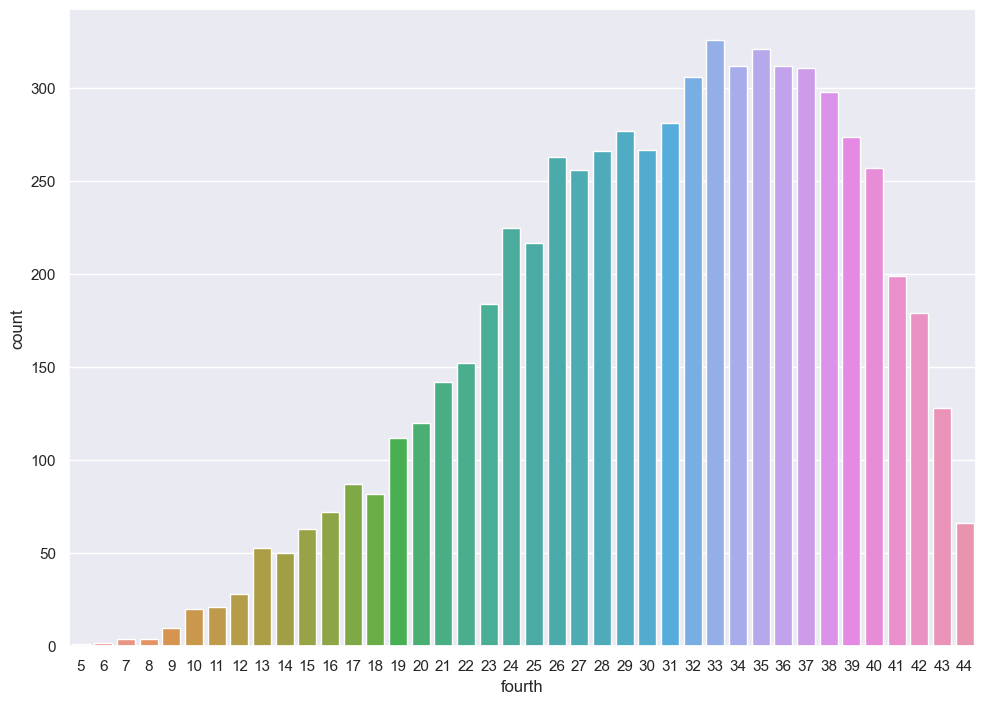

In [16]:
sns.countplot(x='fourth', data=df)

<Axes: xlabel='fifth', ylabel='count'>

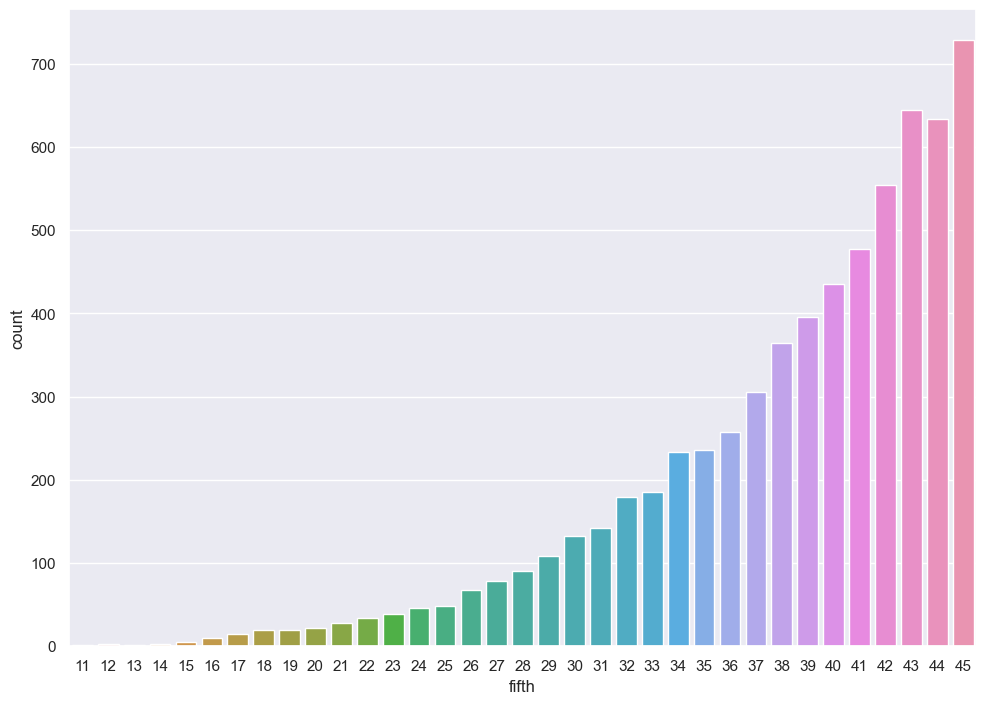

In [17]:
sns.countplot(x='fifth', data=df)

In [ ]:
df.columns

In [18]:
lotto= pd.DataFrame(df, columns= df.columns[4:9])

In [19]:
lotto.head()

,first,second,third,fourth,fifth
0,8,15,29,38,40
1,14,29,34,37,43
2,2,3,11,36,38
3,1,11,27,39,43
4,10,16,37,42,43


In [20]:
def converter(col):
    if col % 2 ==0 :
        return 1
    else:
        return 0

In [21]:
lotto['isEven'] = lotto['fifth'].apply(converter)

In [22]:
lotto['isEven']

0       1
1       0
2       1
3       0
4       0
       ..
6543    1
6544    1
6545    1
6546    0
6547    1
Name: isEven, Length: 6548, dtype: int64

In [23]:
lotto

,first,second,third,fourth,fifth,isEven
0,8,15,29,38,40,1
1,14,29,34,37,43,0
2,2,3,11,36,38,1
3,1,11,27,39,43,0
4,10,16,37,42,43,0
...,...,...,...,...,...,...
6543,8,12,13,31,38,1
6544,22,30,34,41,42,1
6545,7,20,22,32,40,1
6546,2,9,20,24,27,0


In [24]:
lotto.describe()

,first,second,third,fourth,fifth,isEven
count,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000,6548.000000
mean,7.755803,15.290012,23.068571,30.657453,38.320403,0.471594
std,6.093996,7.585310,8.075860,7.693025,6.101827,0.499231
min,1.000000,2.000000,3.000000,5.000000,11.000000,0.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000,0.000000
50%,6.000000,14.000000,23.000000,32.000000,40.000000,0.000000
75%,11.000000,20.000000,29.000000,37.000000,43.000000,1.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000,1.000000


In [25]:
X = lotto.drop('isEven', axis=1)

In [26]:
y = lotto['isEven']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [28]:
X_train

,first,second,third,fourth,fifth
3737,23,24,25,35,36
2089,19,21,30,32,42
59,9,23,27,37,40
429,2,8,22,30,41
3316,3,8,23,29,44
...,...,...,...,...,...
2654,6,21,23,27,37
456,2,10,21,42,44
4955,8,29,34,42,45
5127,16,24,27,34,41


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.svm import SVC

In [31]:
svc_model = SVC()

In [32]:
svc_model.fit(X_train,y_train)

SVC()

In [33]:
predictions = svc_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[564 508]
 [406 487]]


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55      1072
           1       0.49      0.55      0.52       893

    accuracy                           0.53      1965
   macro avg       0.54      0.54      0.53      1965
weighted avg       0.54      0.53      0.54      1965


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [39]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.6s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.5s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.3s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.2s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

In [ ]:
y_train.head()

In [ ]:
y_test.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)
from sklearn.metrics import classification_report

In [ ]:
rfc_preds

In [ ]:
print(classification_report(y_test,rfc_preds))

In [ ]:
lotto.describe()

In [ ]:
long_lotto = lotto.T

In [ ]:
long_lotto.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
long_lotto[6889]

In [ ]:
X= long_lotto.drop([6888, 6889], axis=1)

In [ ]:
X.head()

In [ ]:
 y = long_lotto[6888]

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
svc_long = SVC()

In [ ]:
svc_long.fit(X_train, y_train)

In [ ]:
predictions = svc_long.predict(X_train)

In [ ]:
print(predictions)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
scores = ["precision", "recall"]